# Setup 

In [2]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
# from local_functions import *
import local_functions as lf

# make sure the figures plot inline rather than at the end
%matplotlib inline


Default libraries loaded.


# Paths and Parameters

In [3]:
sz = 100

# Read Data

In [4]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')

# WOA
ds_WOA = xr.open_dataset('../data/woa_cp.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    tcp                          (month, lat, lon) float64 ...
    ocp                          (month, lat, lon) float64 ...
    tcp_thresh_20                (month, lat, lon) float64 ...
    ocp_thresh_50                (month, lat, lon) float64 ...
    tcp_thresh_23                (month, lat, lon) float64 ...
    ocp_thresh_100               (month, lat, lon) float64 ...
    tcp_thresh_25                (month, lat, lon) float64 ...
    ocp_th

# Correlation Maps

In [19]:
slope_TCP_OCP, intercept_TCP_OCP, r_value_TCP_OCP, p_value_TCP_OCP, std_err_TCP_OCP = lf.time_correlate(ds_WOA.tcp,
                                                                                                     ds_WOA.ocp)
            
slope_TCP_SLA, intercept_TCP_SLA, r_value_TCP_SLA, p_value_TCP_SLA, std_err_TCP_SLA = lf.time_correlate(ds_WOA.tcp,
                                                                                                     ds_SLA.mon_sla_mon_clim )

slope_OCP_SLA, intercept_OCP_SLA, r_value_OCP_SLA, p_value_OCP_SLA, std_err_OCP_SLA = lf.time_correlate(ds_WOA.ocp,
                                                                                                     ds_SLA.mon_sla_mon_clim )
  

100%|██████████| 1925/1925 [00:08<00:00, 239.49it/s]


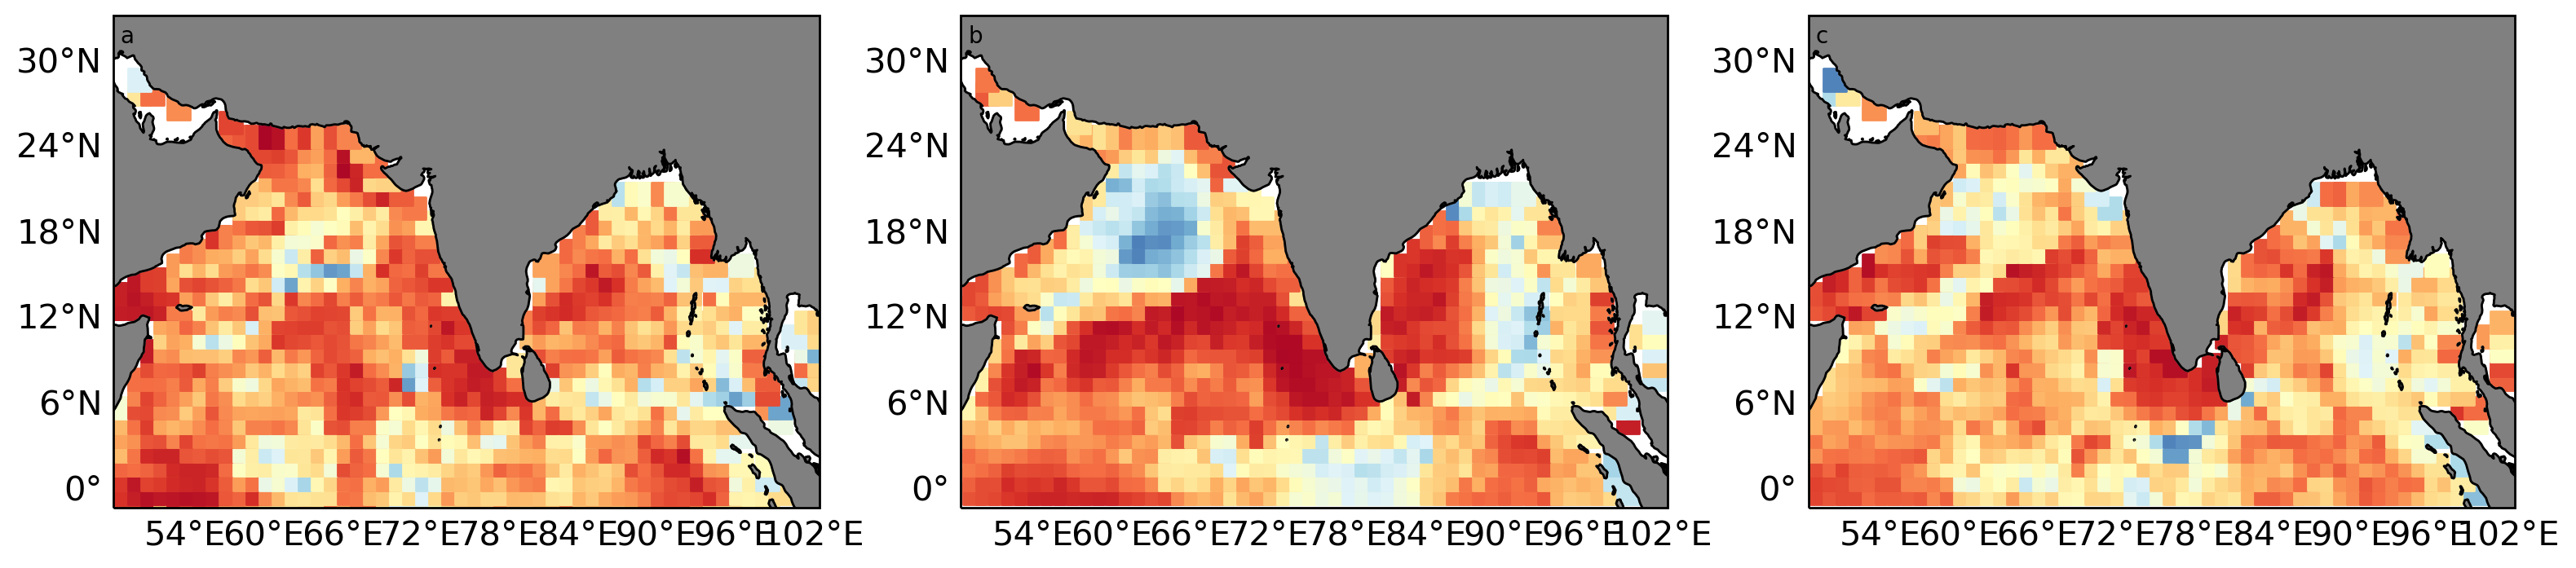

In [29]:
fig = plt.figure(figsize=(19,4),dpi=200)


##############################################################

ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
p = ax.scatter(xx.flatten(),yy.flatten(),c = r_value_TCP_OCP.flatten(),cmap = plt.cm.RdYlBu_r,
              s = sz,marker = 's',vmin = -1, vmax = 1,transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'a')

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
p = ax.scatter(xx.flatten(),yy.flatten(),c = r_value_TCP_SLA.flatten(),cmap = plt.cm.RdYlBu_r,
              s = sz,marker = 's',vmin = -1, vmax = 1,transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'b')

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
p = ax.scatter(xx.flatten(),yy.flatten(),c = r_value_OCP_SLA.flatten(),cmap = plt.cm.RdYlBu_r,
              s = sz,marker = 's',vmin = -1, vmax = 1,transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'c')

# <font color='darkblue'>Save</font> 

In [ ]:
#redo the tcd/ocd for the woa data as is
# make cod to bin the sla and woa into 1 degree bins and save so you can use that since the sla looked really good for the 
# kelvin waves still